In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, ifft
import pywt


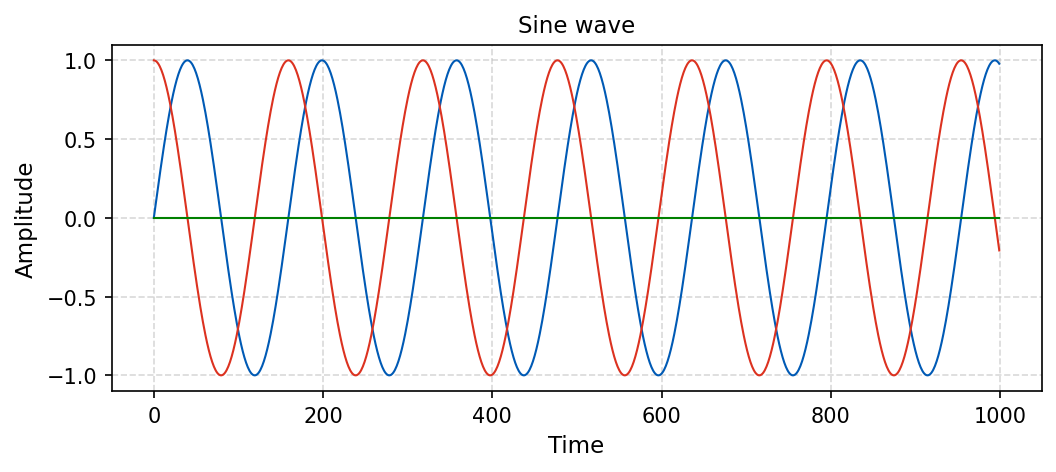

In [200]:
#Options
params = {'legend.fontsize': 9,
          'figure.figsize': (15, 5),
         'axes.labelsize': 11,
         'axes.titlesize':11,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'axes.grid': True,
         'axes.grid.which': 'both',	
         'grid.linestyle': '--',
         'grid.color': 'silver',
         'grid.alpha': 0.6,
         'lines.linewidth': 1,         
         'lines.markersize': 2
         
         }

plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 150
blue = '#005AB5'
red = '#DC3220' 

i=np.linspace(0, 2*np.pi, 1000)
plt.figure( figsize=(8,3))
plt.plot(np.sin(2*np.pi*i), color=blue)
plt.plot(np.cos(2*np.pi*i), color=red)
plt.plot(0*i, "-g")
plt.title("Sine wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()



# Define Functions

In [201]:
def dft(x):

    ''' Calculates the Discrete Fourier Transform (DFT) of a signal '''

    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    return np.dot(e, x)

def idft(X):

    ''' Calculates the Inverse Discrete Fourier Transform (IDFT) of a signal '''
    
    X = np.asarray(X, dtype=complex)
    N = X.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    return np.dot(e, X)/N

def plotdft(y_t, w_sample = 100):
    
    ''' Calculate and plot the DFT and IDFT of a signal '''

    X_dft = dft(np.append(y_t, np.zeros(0)))

    N = y_t.shape[0]
    n = np.arange(N)
    T = N/w_sample
    freq = n/T

    n_oneside = N//2
    X_oneside =X_dft[:n_oneside]/n_oneside
    f_oneside = freq[:n_oneside]

    

    X_oneside = X_dft[:n_oneside] / n_oneside
    
        
        
    plt.figure(figsize=(12, 8))
    '''Plot the signal'''
    plt.subplot(222)
    plt.plot(y_t, color= red)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title('Signal')

    '''Plot DFT'''
    plt.subplot(121)
    plt.plot(f_oneside[1:], np.abs(X_oneside[1:]),
              color=blue)
    plt.xlim(0, 24)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')   
    plt.title('DFT')

    '''Plot IDFT'''
    plt.subplot(224)
    plt.plot( idft(X_dft), color = red )
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title('IDFT')

    plt.suptitle('Discrete Fourier Transform (DFT) \n')

    plt.tight_layout()
    plt.show()

    return

def create_signal():

    ''' Creates a 1 second random sinusoidal signal with a sum of
    3 frequencies and 3 amplitudes
     with a sample rate of 100 samples per second'''

    f1 = np.random.randint(1, 20)
    f2 = np.random.randint(1, 20)
    f3 = np.random.randint(1, 20)

    a1 = np.random.randint(1, 5)
    a2 = np.random.randint(1, 5)
    a3 = np.random.randint(1, 5)

    t = np.linspace(0, 1, 100)

    x = (a1*np.sin(2 * np.pi * f1*t) 
       + a2*np.sin(2 * np.pi *f2*t) 
       + a3*np.sin(2 * np.pi * f3*t) )

    eq = f"${a1}\\sin(2  \\pi  {f1} t) + {a2}\\sin(2  \\pi {f2}t) + {a3}\\sin(2  \\pi  {f3}t)$ "
    return x , eq

In [202]:
def plot_fft(x, s_r, title=''):
    
    '''
    Plot fft of the signa using Numpy library
    
    x - signal
    s_r - sample rate
    tittle - chart tilte
    '''
    X = fft(np.append(x, np.zeros(0)))
    N = len(x)
    n = np.arange(N)
    T = N/s_r
    freq = n/T

    n_oneside = N//2
    X_oneside =X[:n_oneside]/n_oneside*2
    X_oneside[0] = X_oneside[0]/2
    freq_oneside = freq[:n_oneside]

    plt.figure(figsize=(6, 6))

    '''Plot FFT'''
    plt.plot(freq_oneside, np.abs(X_oneside), 'b')
    plt.xlim(0, freq_oneside.max()*0.5)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')   
    plt.title('FFT '+title)

In [203]:
def plot_fft_multiple(x, s_r, label='', color='b', linewidth=1, alpha=1):
    '''
    Adjust a fft plot to a subplot configuration
    '''
    X = fft(np.append(x, np.zeros(0)))
    N = len(x)
    n = np.arange(N)
    T = N/s_r
    freq = n/T

    n_oneside = N//2
    X_oneside =X[:n_oneside]/n_oneside*2
    X_oneside[0] = X_oneside[0]/2
    freq_oneside = freq[:n_oneside]

    '''Plot FFT'''
    plt.plot(freq_oneside, np.abs(X_oneside), color, linewidth=linewidth, label=label, alpha=alpha)
    plt.xlim(0, freq_oneside.max()*0.5)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')   
    plt.title('FFT ')

# Load data

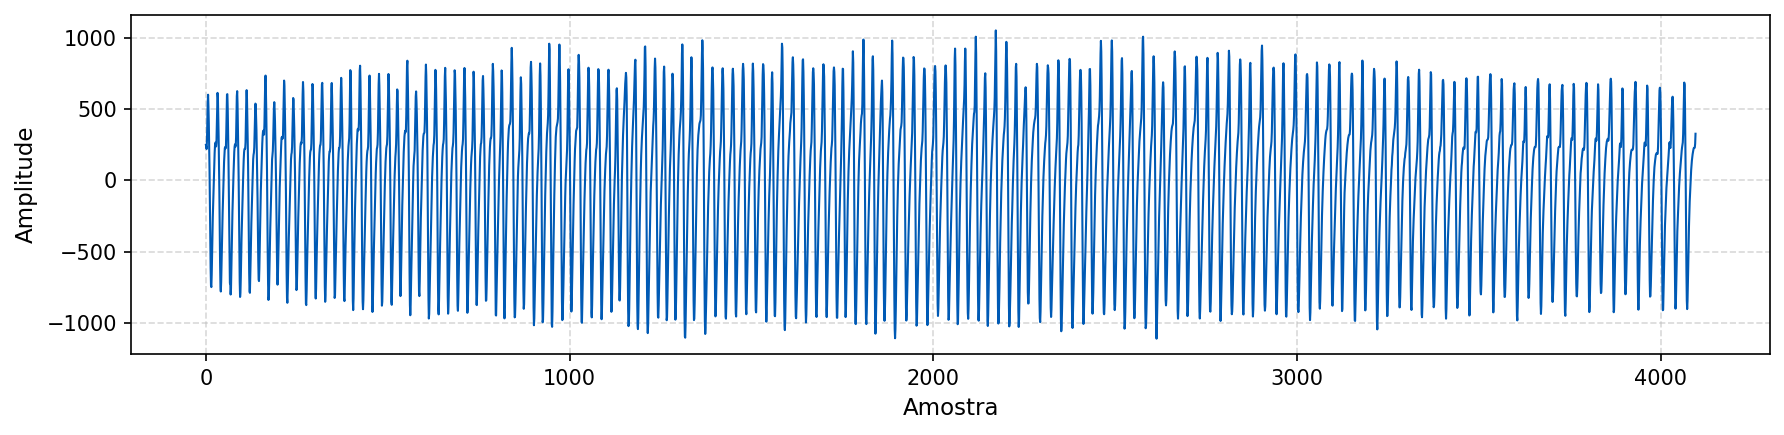

-------DATASET INFORMATION--------
dataset size: 4097
Sample rate: 173.60169491525423 Hz
                 0
count  4097.000000
mean    -14.875519
std     519.025196
min   -1107.000000
25%    -429.000000
50%      78.000000
75%     365.000000
max    1050.000000
---------------------------------


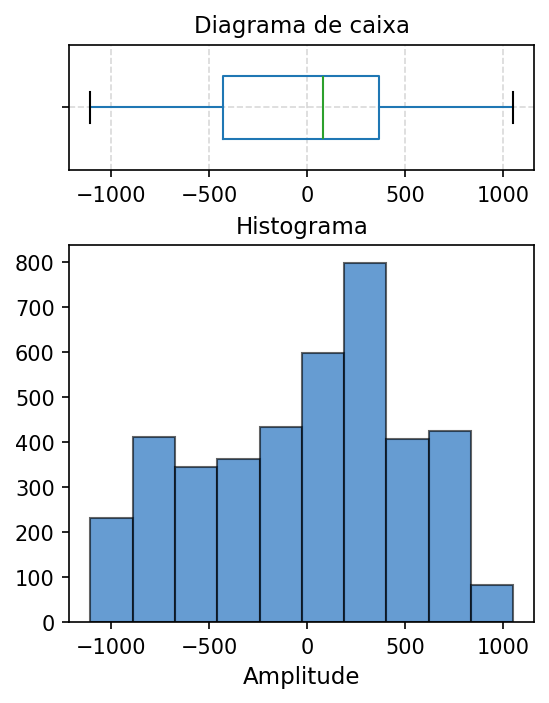

In [204]:
df = pd.read_csv('Data/S080.txt', header=None)  #080  097

plt.figure(figsize=(12, 3))
plt.plot(df, color = blue)
plt.ylabel("Amplitude")
plt.xlabel("Amostra")
plt.tight_layout()
plt.savefig("Figures/Fig01.svg")
plt.show()

print('-------DATASET INFORMATION--------')
print(f'dataset size: {df.shape[0]}')
print(f"Sample rate: {1/(23.6/(df.shape[0]))} Hz")
print(df.describe())
print('---------------------------------')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [2, 6]})


df.boxplot(ax=ax1, vert=False, widths=0.5)  # adjust the width to change the box width
ax1.set_yticklabels([])


df.hist(ax=ax2, edgecolor='k', color= blue, alpha= 0.6)
ax2.set_xlabel("Amplitude")
ax2.grid()

ax1.set_title('Diagrama de caixa')
ax2.set_title('Histograma')
plt.show()

# Implement Fast Fourier Transform

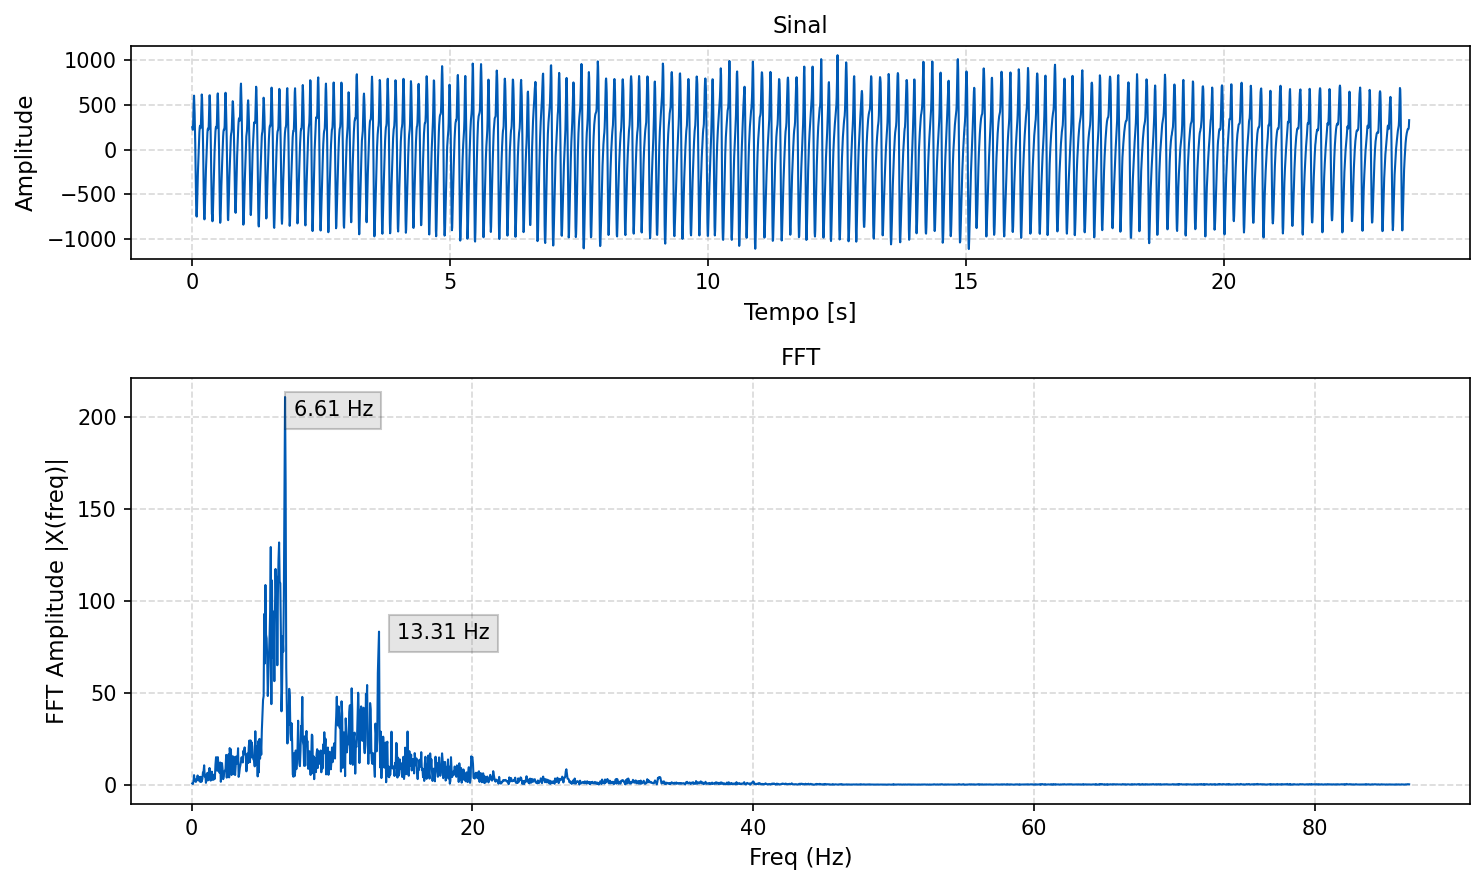

In [205]:
signal_size = len(df)##//16

#################
s_r = 173.61  ## Sample  rate

time = np.linspace(0, signal_size/s_r, signal_size)  ## Transform samples to time 

x = np.asarray(df[:signal_size], dtype=float)

x = np.append(x, np.zeros(0))

##Calculates FFT
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/s_r
freq = n/T # two sides frequency range

n_oneside = N//2
X_oneside =X[:n_oneside]/n_oneside
freq_oneside = freq[:n_oneside]

#pick freq where max X happens
freq_max = freq_oneside[np.argmax(np.abs(X_oneside[1:]))]

X_sorted = np.sort(np.abs(X_oneside[1:]))[::-1]
freq_sorted = freq_oneside[np.argsort(np.abs(X_oneside[1:]))[::-1]]


import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 6))

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0])
plt.plot(time, x[:signal_size], blue , linewidth=1)
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.title('Sinal')

ax2 = fig.add_subplot(gs[1])
plt.plot(freq_oneside[1:], np.abs(X_oneside[1:]), blue, linewidth=1)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('FFT')
#plt.xlim(0, 24)
plt.text(freq_max*1.1,
          max(np.abs(X_sorted))*0.95,
          f'{round(freq_max, 2)} Hz',
          bbox=dict(facecolor='grey', alpha=0.2),
          fontsize=10)

plt.text(freq_sorted[20]*1.1,
          np.abs(X_sorted[20])*0.95,
          f'{round(freq_sorted[20], 2)} Hz',
          bbox=dict(facecolor='grey', alpha=0.2),
          fontsize=10)

plt.tight_layout()
plt.show()



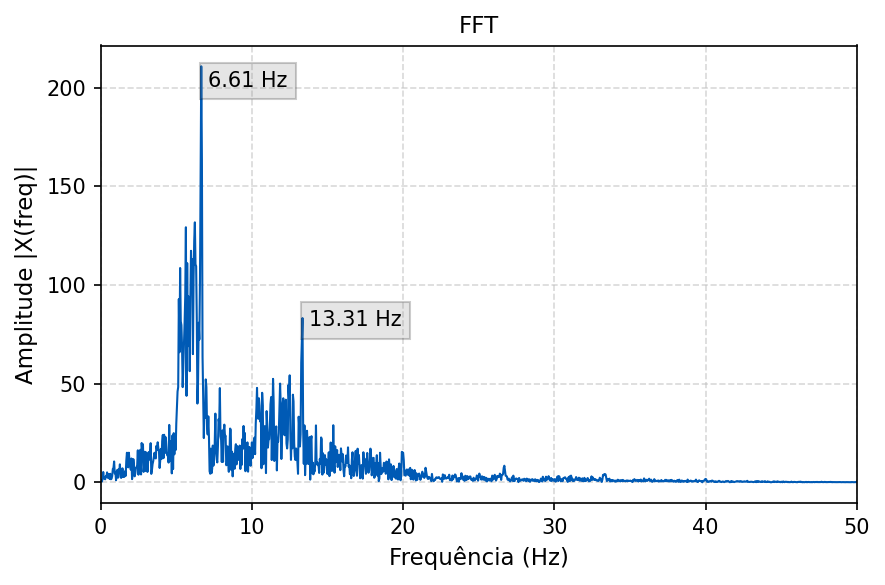

In [206]:
plt.figure(figsize=(6, 4))

plt.plot(freq_oneside[1:], np.abs(X_oneside[1:]), blue, linewidth=1)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude |X(freq)|')
plt.title('FFT')
plt.xlim(0, 50)
plt.text(freq_max+0.5,
          max(np.abs(X_sorted))*0.95,
          f'{round(freq_max, 2)} Hz',
          bbox=dict(facecolor='grey', alpha=0.2),
          fontsize=10)

plt.text(freq_sorted[20]+0.5,
          np.abs(X_sorted[20])*0.95,
          f'{round(freq_sorted[20], 2)} Hz',
          bbox=dict(facecolor='grey', alpha=0.2),
          fontsize=10)

plt.tight_layout()
plt.savefig("Figures/Fig02.svg")
plt.show()

## Apply Discrete Fourier Transform

c:\Users\rafae\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\rafae\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


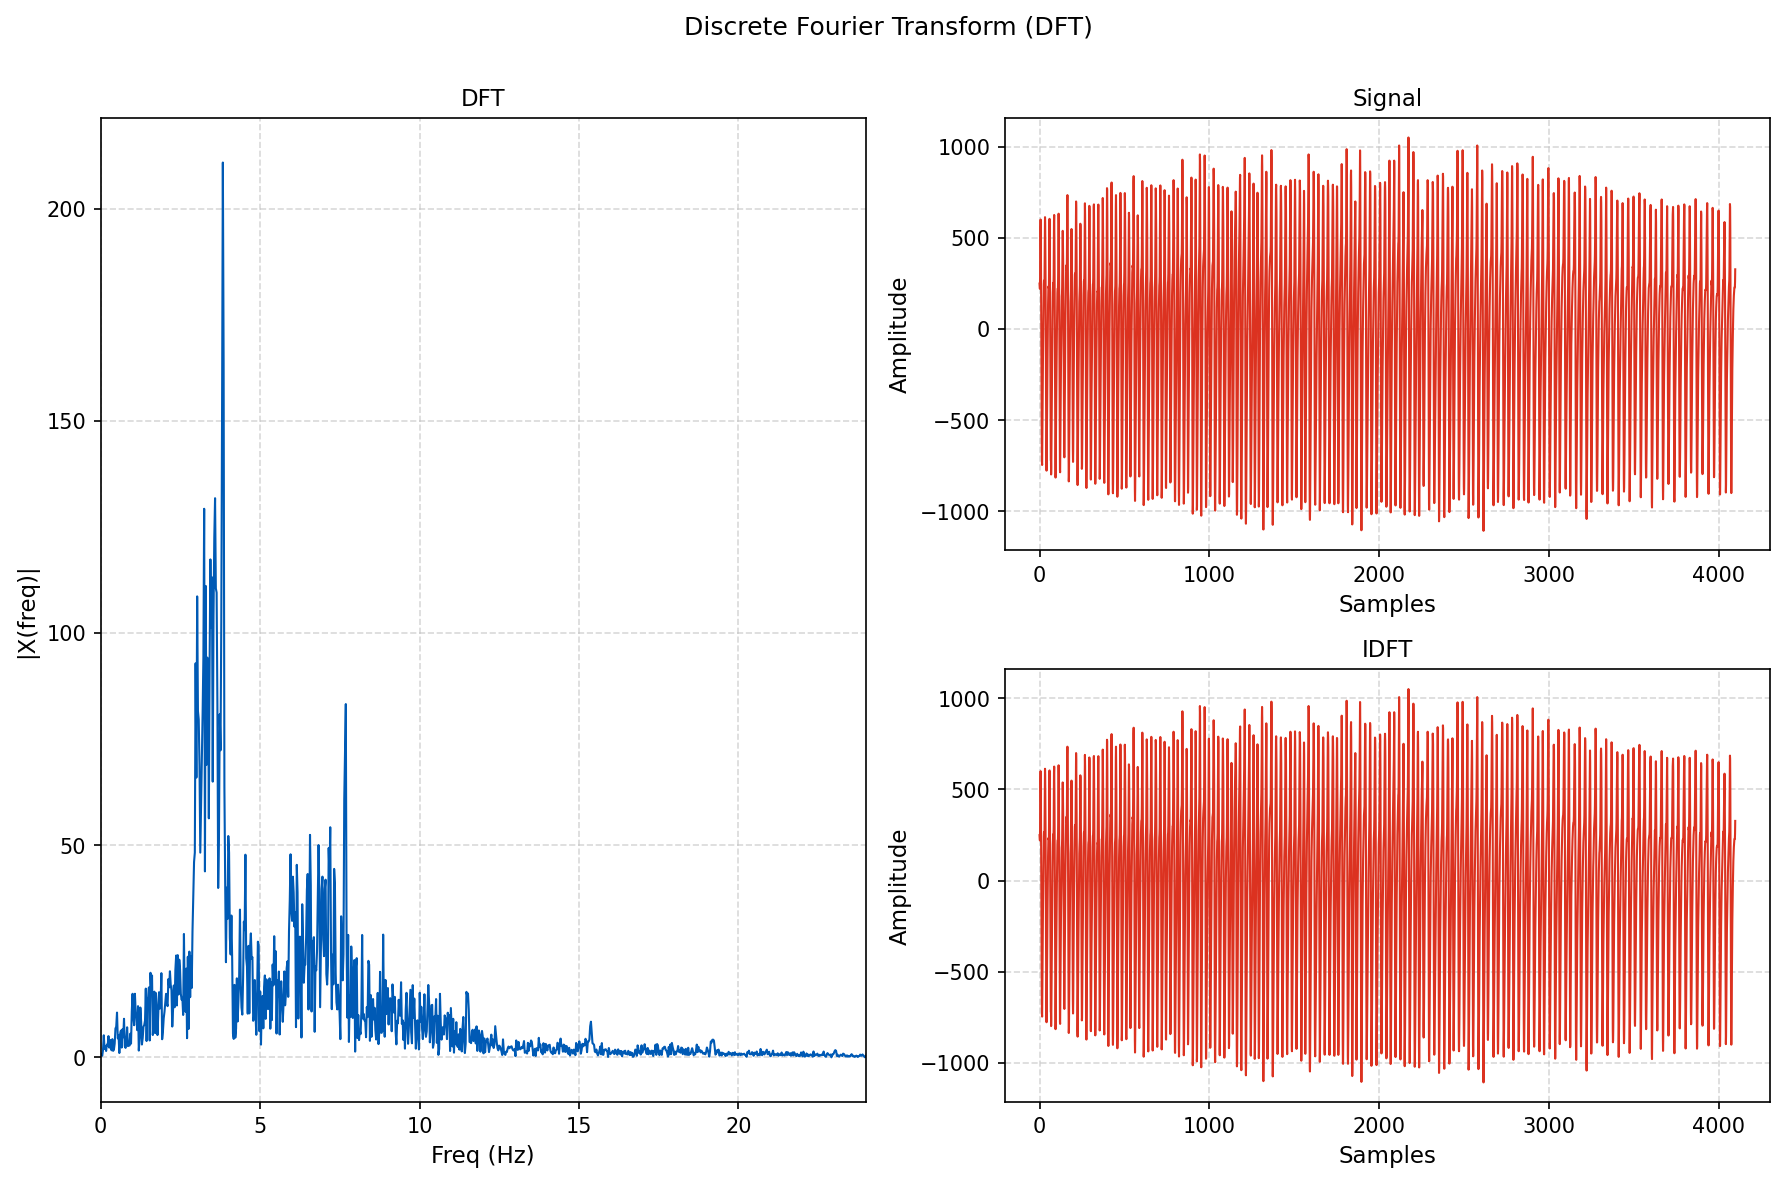

In [207]:
plotdft(x)

In [208]:
f1 = 6.610486
f2 = 13.305721

# Window analysis

## Gabor

### Define Gabor Plot Function

In [209]:
from scipy.signal import stft, get_window

def gabor_plot(signal, fs, split=5):
    ''' 
    Plot Gabor Transform in scalogram
    signal - signal data
    fs - sample frequency
    splits - number of split to perform the windowed function
    '''
     
    nperseg = int(len(signal)//split)  # Window length
    std = 40  # standard deviation of Gaussian

    # Generate Gaussian window
    window = get_window(('gaussian', std), nperseg)

    # Apply Gabor Transform (Gaussian-windowed STFT)
    frequencies, times, Zxx = stft(signal, fs=fs, window=window, nperseg=nperseg)



    # Plot Gabor spectrogram
    
    plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud', cmap='coolwarm')
    plt.title(f'Transfomada de Gabor\n Janelas={split} - T={23.6/split:.2f}s') #(Gaussian-windowed STFT)
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [s]')

    plt.hlines([f1, f2], 0, times[-1], colors= 'w' , linestyles='--', linewidth=1, label='Frequências de interesse')

    plt.colorbar(label='Magnitude')
    plt.ylim(0, 20)  # Optional: zoom into low frequencies
    plt.xlim(0, 23.6)
    plt.legend(fontsize=9)
    plt.grid()
    plt.tight_layout()
    




### Plot Gabor transform

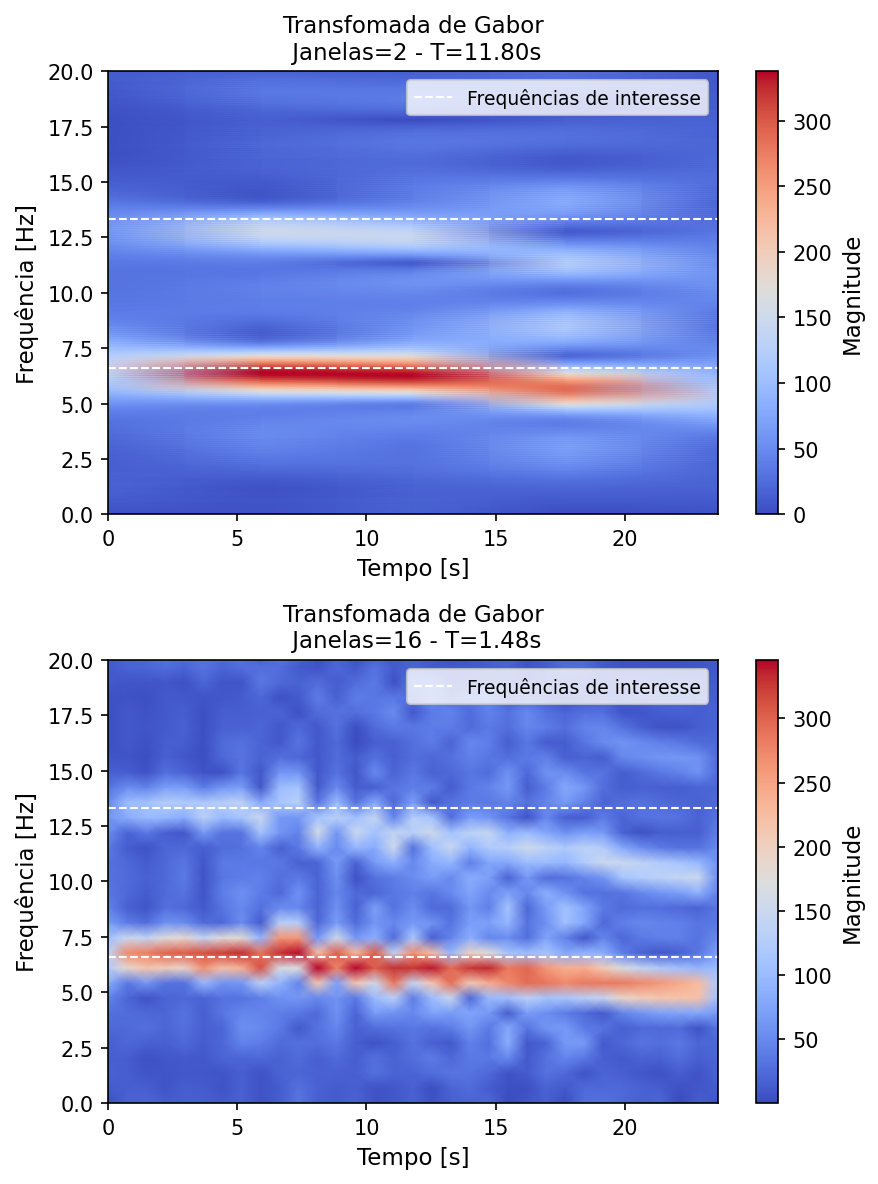

In [210]:
i=0
plt.figure(figsize=(6, 8))
for split in [2,16]:
    plt.subplot(2, 1, i+1)
    gabor_plot(x, s_r, split)
    i+=1

plt.tight_layout()
plt.savefig("Figures/Fig03.svg")
plt.savefig("Figures/Fig03.png", dpi=600)
plt.show()

## Wavelet

C:\Users\rafae\AppData\Local\Temp\ipykernel_9936\152195264.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


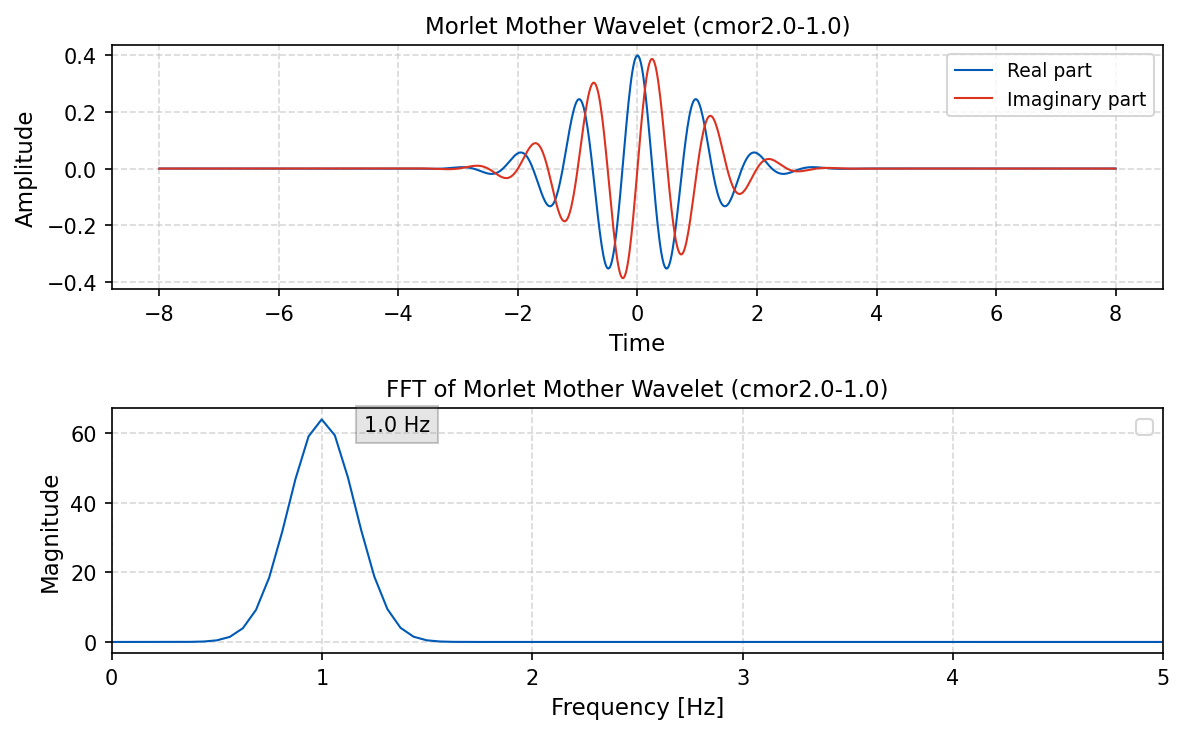

In [211]:
# Define the wavelet
wavelet_str = 'cmor2.0-1.0'
wavelet = pywt.ContinuousWavelet(wavelet_str)

# Get the wavelet function (psi is complex, x is time)
psi, x_wave = wavelet.wavefun(level=10)

# Plot
plt.figure(figsize=(8, 5))
plt.subplot(211)
plt.plot(x_wave, np.real(psi), label='Real part', color=blue)
plt.plot(x_wave, np.imag(psi), label='Imaginary part', color=red)    
plt.title(f'Morlet Mother Wavelet ({wavelet_str})')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)



# Compute the FFT of the wavelet
psi_fft = np.fft.fft(psi)
freqs = np.fft.fftfreq(len(psi), d=(x_wave[1] - x_wave[0]))  # get frequency axis

# Shift zero freq to center
psi_fft_shifted = np.fft.fftshift(psi_fft)
freqs_shifted = np.fft.fftshift(freqs)

# only positive frequencies
freqs_shifted = freqs_shifted[freqs_shifted >= 0]
psi_fft_shifted = psi_fft_shifted[len(freqs_shifted):]

# Plot the magnitude spectrum
plt.subplot(212)
plt.plot(freqs_shifted, np.abs(psi_fft_shifted), color=blue)
plt.title(f'FFT of Morlet Mother Wavelet ({wavelet_str})')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend(fontsize=10)
plt.xlim(0, 5)

plt.grid(True)

fmax = freqs_shifted[np.argmax(np.abs(psi_fft_shifted))]

plt.text(1.2, 
         np.max(np.abs(psi_fft_shifted))*0.95,
           f'{round(fmax, 2)} Hz',
             fontsize=10,
               color='k',
               bbox=dict(facecolor='grey', alpha=0.2))


plt.tight_layout()
plt.show()




## Plotting wavelet function

In [212]:
def plot_wavelet_transform(x, s_r, ax=None, fig=None, f1=0, f2=0, scale=(1,64), 
                           wavelet_str='cmor2.0-1.0', title=''):
    '''Calculates and plots Wavelet transform
    x - signal
    s_r - sample rate
    ax - axis to plot on (if None, create new)
    fig - figure to plot on (if None, create new)
    f1 - first frequency of interest
    f2 - second frequency of interest
    scale - scaling resolution
    wavelet_str - name of the wavelet function
    title - chart title
    
    Returns:
    fig, ax - the figure and axis objects
    '''

    time = np.linspace(0, len(x) / s_r, len(x))

    wavelet = pywt.ContinuousWavelet(wavelet_str)

    scales = np.arange(scale[0], scale[1])

    # Perform CWT
    coefficients, freqs = pywt.cwt(x, scales, wavelet, sampling_period=1/s_r)
    
    # If no axes are provided, create a new figure and axes
    if ax is None or fig is None:
        fig = plt.figure(figsize=(10, 3))
        gs = gridspec.GridSpec(1, 2, width_ratios=[30, 0.5], wspace=0.2)
        ax = fig.add_subplot(gs[0])
        add_colorbar = True
    else:
        add_colorbar = False

    # Plot the wavelet transform
    im = ax.imshow(np.abs(coefficients),
                  extent=[0, time.max(), scales[-1], scales[0]],
                  cmap='coolwarm',    
                  aspect='auto',
                  vmax=abs(coefficients).max())

    if title:
        ax.set_title(title)
    else:
        ax.set_title(f"Escalograma - Transformada Wavelet \nWavelet: {wavelet_str}")
        
    ax.set_xlabel('Tempo [s]')
    ax.set_ylabel('Escala')

    # Add y-axis for frequencies
    ax2 = ax.twinx()
    ax2.set_ylabel('Frequência [Hz]')

    n_ticks = min(7, len(scales))
    tick_indices = np.linspace(0, len(scales) - 1, n_ticks, dtype=int)
    yticks = [scales[i] for i in tick_indices]
    ytick_labels = [f'{freqs[i]:.2f}' for i in tick_indices]

    ax2.set_ylim(scales[-1], scales[0])
    ax2.set_yticks(yticks)
    ax2.set_yticklabels(ytick_labels)

    # Add colorbar 
    if add_colorbar:
        cax = fig.add_subplot(gs[1])
        cbar = fig.colorbar(im, cax=cax)
        cbar.set_label('Magnitude')
    
    ax.grid(False)
    ax2.grid(False)

    # Highlight frequencies of interest
    if f1 > 0 and f2 > 0:
        highlight_freqs = [f1, f2]
        highlight_scales = [pywt.central_frequency(wavelet) * s_r / f for f in highlight_freqs]

        for i, (scale, f) in enumerate(zip(highlight_scales, highlight_freqs)):
            ax.axhline(y=scale, color='w', linestyle='--', linewidth=1.5,
                      label='Frequências de interesse' if i == 0 else None)

        ax.legend(fontsize=9, loc='lower left')
    
    return fig, ax, im

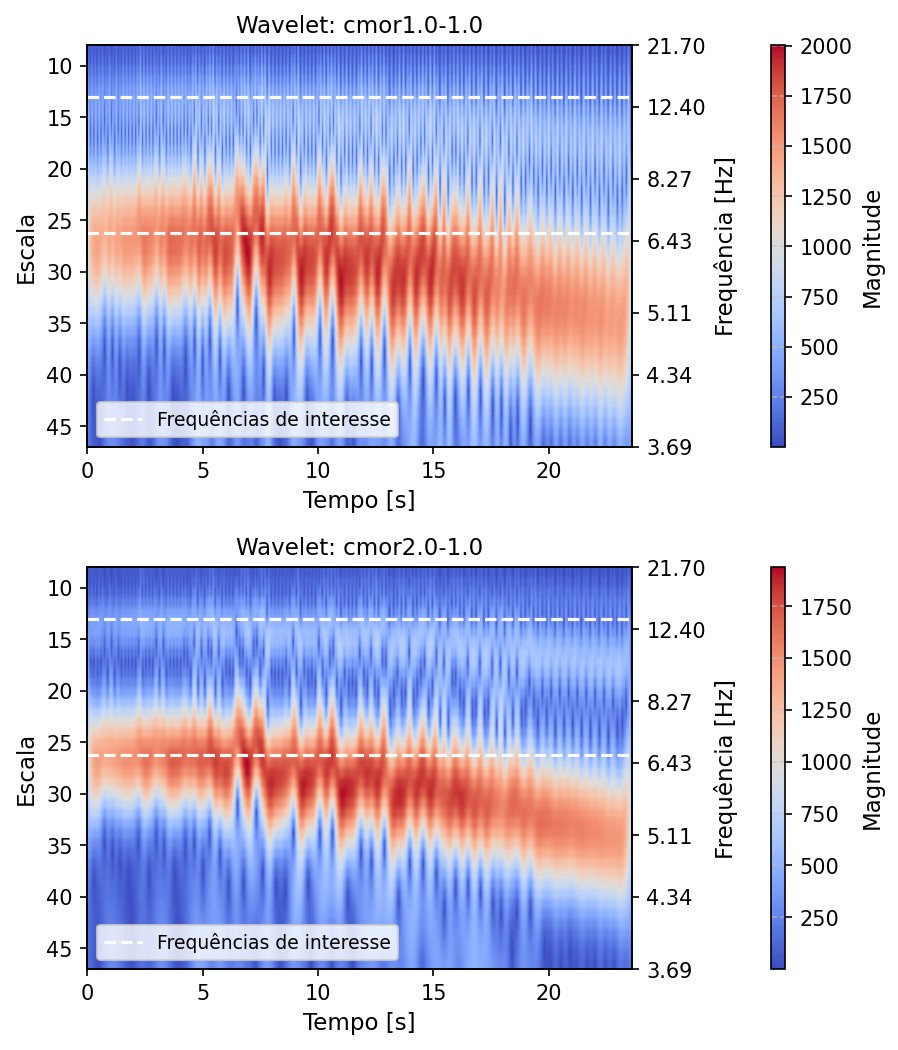

In [213]:
scale=(8,48)
wavelet_1 = 'cmor1.0-1.0'
wavelet_2 = 'cmor2.0-1.0'

fig = plt.figure(figsize=(6, 8))

# Create GridSpec 
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[20, 0.5], wspace=0.5, hspace=0.3)

# First wavelet plot
ax1 = fig.add_subplot(gs[0, 0])
_, _, im1 = plot_wavelet_transform(x, s_r, ax=ax1, fig=fig, f1=f1, f2=f2, 
                                    scale=scale, wavelet_str=wavelet_1,
                                    title=f"Wavelet: {wavelet_1}")

# Colorbar for first plot
cax1 = fig.add_subplot(gs[0, 1])
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.set_label('Magnitude')

# Second wavelet plot
ax2 = fig.add_subplot(gs[1, 0])
_, _, im2 = plot_wavelet_transform(x, s_r, ax=ax2, fig=fig, f1=f1, f2=f2, 
                                    scale=scale, wavelet_str=wavelet_2,
                                    title=f"Wavelet: {wavelet_2}")

# Colorbar for second plot
cax2 = fig.add_subplot(gs[1, 1])
cbar2 = fig.colorbar(im2, cax=cax2)
cbar2.set_label('Magnitude')

plt.savefig("Figures/Fig04.svg")
plt.savefig("Figures/Fig04.png", dpi=600)

plt.show()

# Filter

## Application with the order input directly

In [39]:
from scipy.signal import butter, filtfilt, cheby1, ellip

# Filter settings
fs = s_r           # Sampling frequency in Hz
lowcut = 6      # Lower cutoff frequency (Hz)
highcut = 7    # Upper cutoff frequency (Hz)
order = 2         # Filter order

lowcut_2 = 13     # Lower cutoff frequency (Hz)
highcut_2 = 14    # Upper cutoff frequency (Hz)

# Normalize cutoff frequencies to Nyquist frequency
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

low_2 = lowcut_2 / nyq
high_2 = highcut_2 / nyq

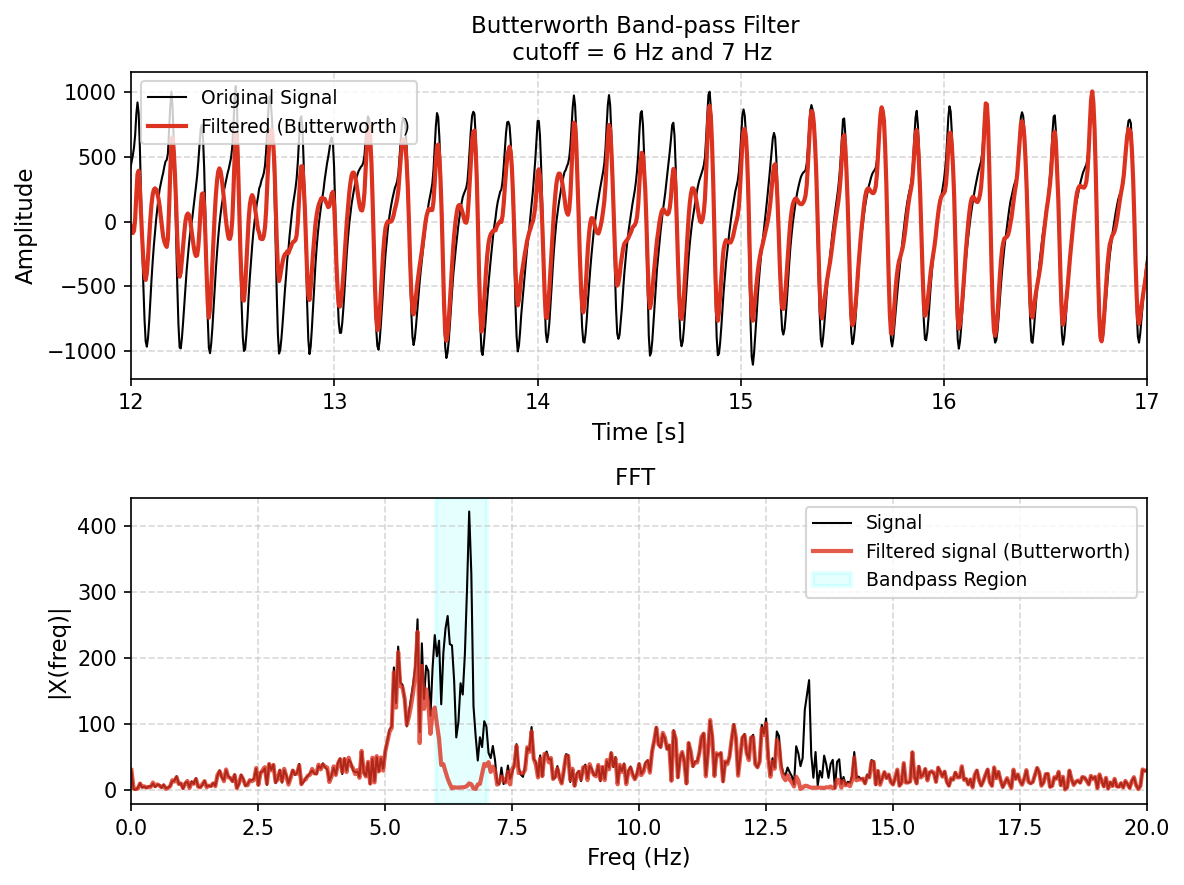

In [ ]:

# Butterworth filter
b, a = butter(order, [low, high], btype='bandstop', analog=False)

# Apply zero-phase filtering
x_filtered = filtfilt(b, a, x)


b, a = butter(order, [low_2, high_2], btype='bandstop', analog=False)
x_filtered = filtfilt(b, a, x_filtered)

#x_filtered = x_filtered + x_filtered_2
##############################
# Plotting

time = np.linspace(0, len(x) / fs, len(x))

plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(time, x, label='Original Signal', color = 'k', linewidth=1)	
plt.plot(time, x_filtered, label='Filtered (Butterworth )', color = red, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(fontsize=9)
plt.title(f'Butterworth Band-pass Filter \n cutoff = {lowcut} Hz and {highcut} Hz')
plt.grid(True)
plt.xlim(12, 17)


plt.subplot(212)
plot_fft_multiple(x, s_r, 'Signal', color= 'k', linewidth=1)
plot_fft_multiple(x_filtered, s_r, 'Filtered signal (Butterworth)', color=red, linewidth=2 ,alpha=0.8)
plt.xlim(0, 20)

plt.axvspan(lowcut, highcut, color='aqua', alpha=0.1, label='Bandpass Region', linewidth=2)

plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


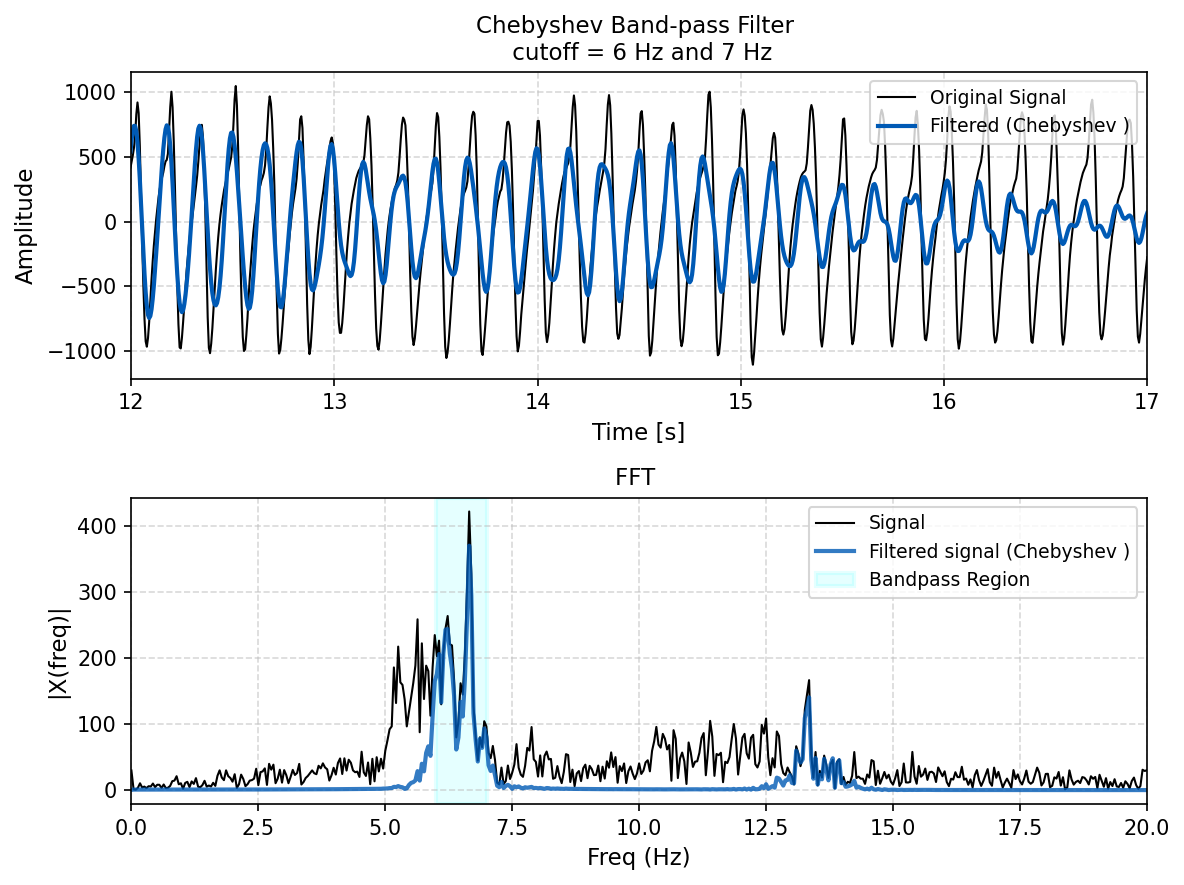

In [ ]:
# Chebyshev I filter
ripple = 1        # Passband ripple in dB
b, a = cheby1(order, ripple, [low, high], btype='band')

# Apply zero-phase filter
x_cheby_filtered = filtfilt(b, a, x)

b,a = cheby1(order, ripple, [low_2, high_2], btype='band')
x_cheby_filtered_2 = filtfilt(b, a, x)

x_cheby_filtered = x_cheby_filtered + x_cheby_filtered_2
##############################
# Plotting

time = np.linspace(0, len(x) / fs, len(x))

plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.plot(time, x, label='Original Signal', color = 'k', linewidth=1)	
plt.plot(time, x_cheby_filtered, label='Filtered (Chebyshev )', color = blue, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(fontsize=9)
plt.title(f'Chebyshev Band-pass Filter \n cutoff = {lowcut} Hz and {highcut} Hz')
plt.grid(True)
plt.xlim(12, 17)


plt.subplot(212)
plot_fft_multiple(x, s_r, 'Signal', color= 'k', linewidth=1)
plot_fft_multiple(x_cheby_filtered, s_r, 'Filtered signal (Chebyshev )', color=blue, linewidth=2 ,alpha=0.8)
plt.xlim(0, 20)
plt.axvspan(lowcut, highcut, color='aqua', alpha=0.1, label='Bandpass Region', linewidth=2)
plt.legend(fontsize=9, loc='best')


plt.tight_layout()
plt.show()

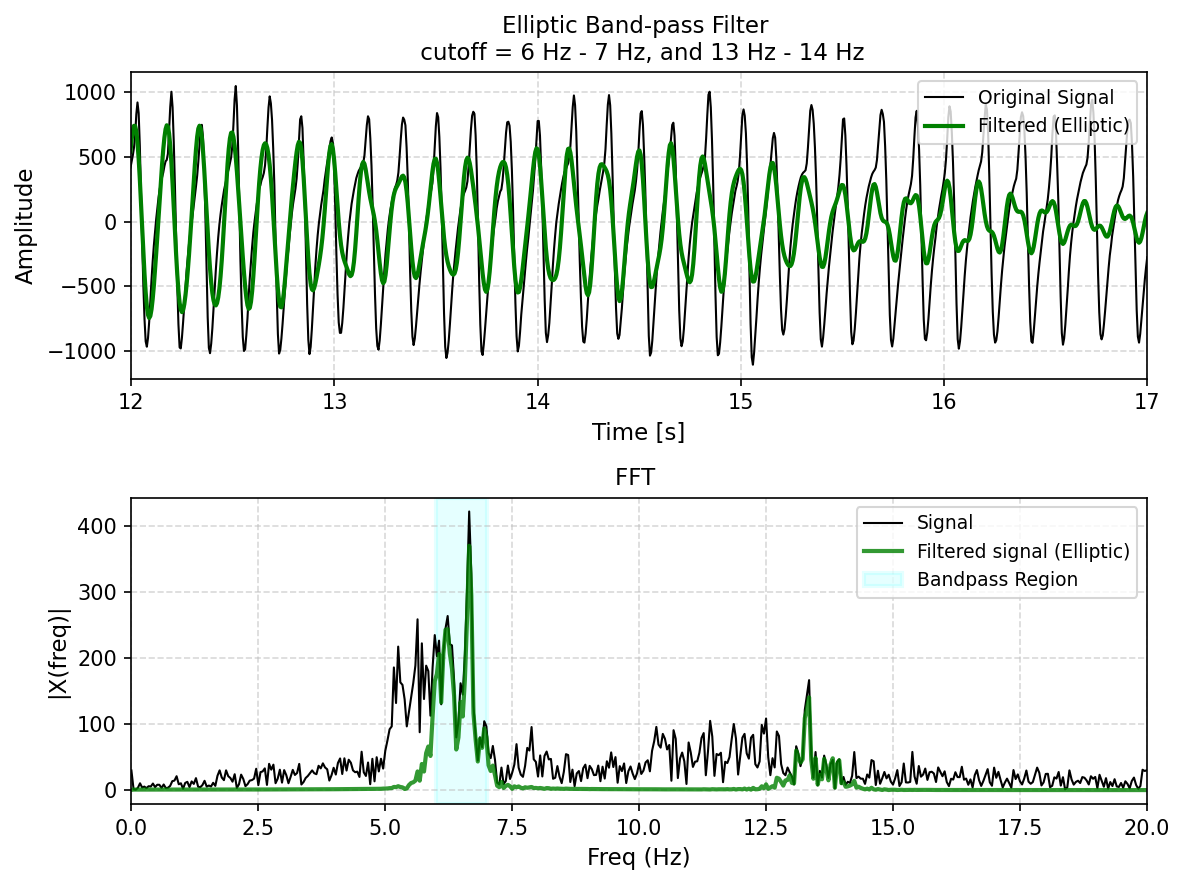

In [ ]:
# Elliptic filter
ripple = 1        # Passband ripple in dB
rs = 50          # Stopband attenuation in dB (required for elliptic filter)

# Note: ellip returns (b, a) not (a, b)
b, a = ellip(order, ripple, rs, [low, high], btype='band')
x_ellip_filtered = filtfilt(b, a, x)

b, a = ellip(order, ripple, rs, [low_2, high_2], btype='band')
x_ellip_filtered_2 = filtfilt(b, a, x)

x_ellip_filtered = x_ellip_filtered + x_ellip_filtered_2

##############################
# Plotting

plt.figure(figsize=(8, 6))

plt.subplot(211)
plt.plot(time, x, label='Original Signal', color='k', linewidth=1)	
plt.plot(time, x_ellip_filtered, label='Filtered (Elliptic)', color= 'g' , linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(fontsize=9)
plt.title(f'Elliptic Band-pass Filter \n cutoff = {lowcut} Hz - {highcut} Hz, and {lowcut_2} Hz - {highcut_2} Hz')
plt.grid(True)
plt.xlim(12, 17)

plt.subplot(212)
plot_fft_multiple(x, s_r, 'Signal', color='k', linewidth=1)
plot_fft_multiple(x_ellip_filtered, s_r, 'Filtered signal (Elliptic)', color='g', linewidth=2, alpha=0.8)
plt.xlim(0, 20)
plt.axvspan(lowcut, highcut, color='aqua', alpha=0.1, label='Bandpass Region', linewidth=2)
plt.legend(fontsize=9, loc='best')

plt.tight_layout()
plt.show()

## Filter Design

### Low-pass Butterworth

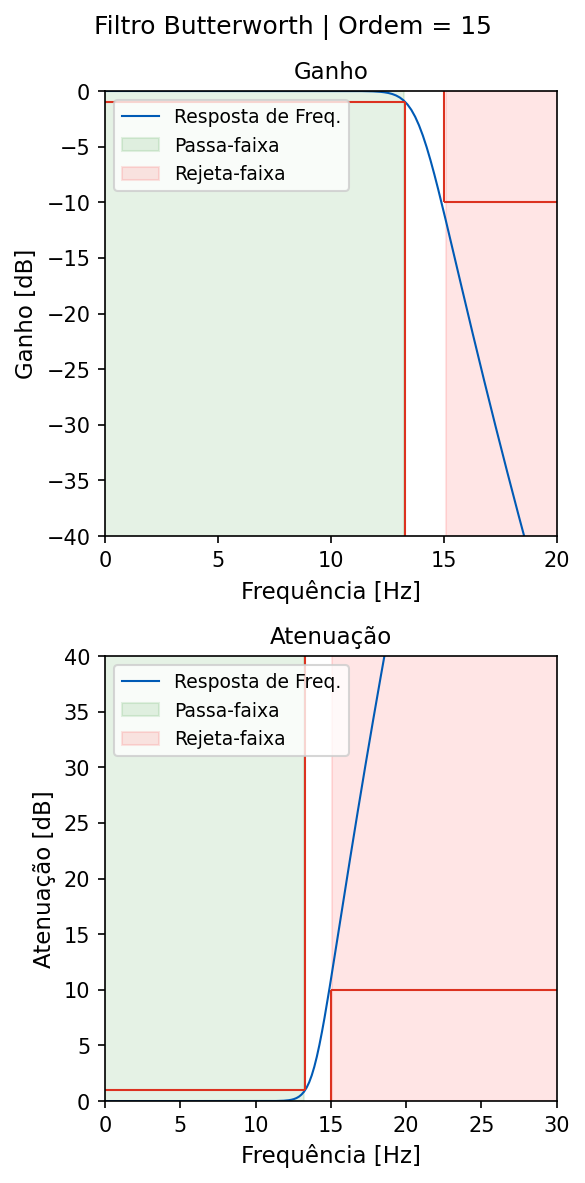

In [102]:
from scipy.signal import buttord, butter, freqz
import matplotlib.pyplot as plt
import numpy as np

# Design 
f_p = 13.3   # Passband frequency in Hz
f_s = 15   # Stopband frequency in Hz
A_max = 1   # Passband ripple in dB
A_min =10  # Stopband attenuation in dB
fs = s_r    # Sampling frequency in Hz

# Normalize frequencies to Nyquist (fs/2)
nyq = fs / 2
wp = f_p / nyq
ws = f_s / nyq

# Determine minimum order and cutoff
N, Wn = buttord(wp, ws, A_max, A_min)
b, a = butter(N, Wn, btype='low')

# Frequency response
w, h = freqz(b, a, fs=fs)
gain_db = 20 * np.log10(abs(h))

attenuation_db = -gain_db

# Plot
plt.figure(figsize=(4, 8))

plt.suptitle(f'Filtro Butterworth | Ordem = {N}')

plt.subplot(211)
plt.plot(w, gain_db, label='Resposta de Freq.', color= blue)

# Fill Passbans and Stopband
plt.fill_between(w, 0, gain_db.min(),
                 where=(w <= f_p),
                 color='green', alpha=0.1,
                 label='Passa-faixa')


plt.fill_between(w, 0, gain_db.min(),
                 where=(w >= f_s),
                 color='red', alpha=0.1,
                 label='Rejeta-faixa')

# Add cut-off lines
plt.hlines(-A_max, 0, f_p, color=red, linestyle='-')
plt.vlines(f_p, -A_max, -A_min*4, color=red, linestyle='-')

plt.hlines(-A_min, f_s, fs/2, color=red, linestyle='-')
plt.vlines(f_s, -A_min, 0, color=red, linestyle='-')



# Labels
plt.title(f'Ganho')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho [dB]')
plt.xlim(0, f_s + 5)
plt.ylim(-A_min *4, 0)
plt.grid(False)
plt.legend()


plt.subplot(212)
plt.plot(w, attenuation_db, label='Resposta de Freq.', color=blue)

# Fill Passbans and Stopband
plt.fill_between(w, 0, -gain_db.min(),
                 where=(w <= f_p),
                 color='green', alpha=0.1,
                 label='Passa-faixa')


plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_s),
                 color='red', alpha=0.1,
                 label='Rejeta-faixa')

# Add cut-off lines
plt.hlines(A_max, 0, f_p, color=red, linestyle='-')
plt.vlines(f_p, A_max, A_min*4, color=red, linestyle='-')

plt.hlines(A_min, f_s, fs/2, color=red, linestyle='-')
plt.vlines(f_s, A_min, 0, color=red, linestyle='-')


#labels
plt.title(f'Atenuação')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Atenuação [dB]')
plt.xlim(0, f_s + 15)
plt.ylim(0, A_min * 4)

plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()




### Low-pass Chebyshev

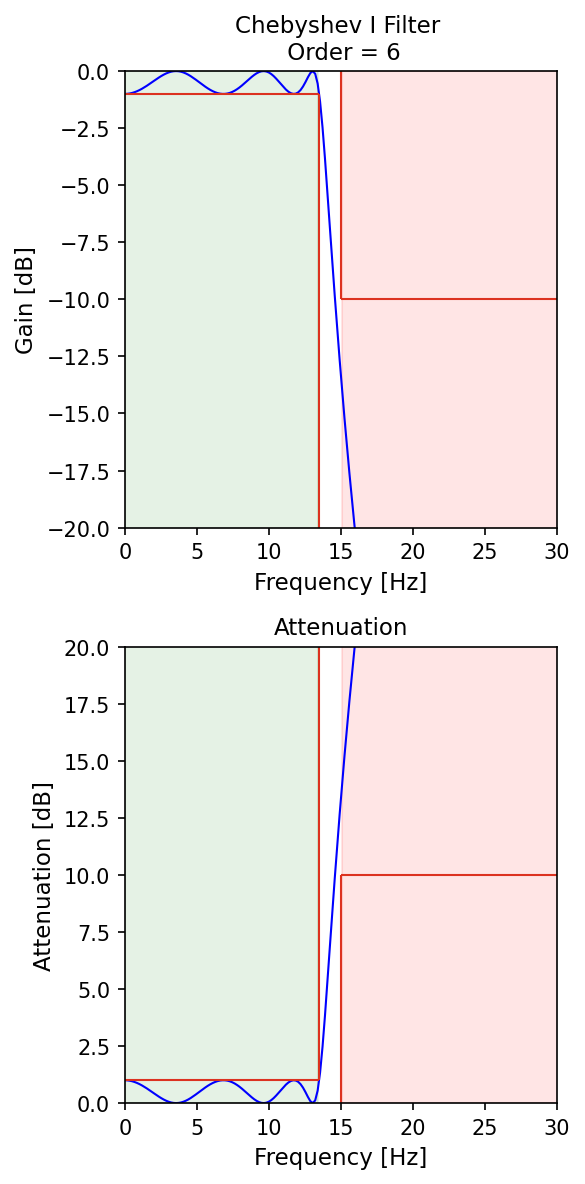

In [119]:
from scipy.signal import cheb1ord, cheby1, freqz

# Design specs
f_p = 13.5    # Passband frequency in Hz
f_s = 15  # Stopband frequency in Hz
A_max = 1   # Passband ripple in dB
A_min = 10  # Stopband attenuation in dB
fs = s_r    # Sampling frequency in Hz (assumed to be defined)

# Normalize frequencies
nyq = fs / 2
wp = f_p / nyq
ws = f_s / nyq

# Determine minimum order and cutoff frequency
N, Wn = cheb1ord(wp, ws, A_max, A_min)
b, a = cheby1(N, A_max, Wn, btype='low')

# Frequency response
w, h = freqz(b, a, fs=fs)
gain_db = 20 * np.log10(np.maximum(abs(h), 1e-10))  # avoid log(0)
attenuation_db = -gain_db

# Plot: Frequency Response with Boundaries
plt.figure(figsize=(4, 8))
plt.subplot(211)
plt.plot(w, gain_db, label='Frequency response', color='blue')

# Fill Passbans and Stopband
plt.fill_between(w, 0, gain_db.min(),
                 where=(w <= f_p),
                 color='green', alpha=0.1,
                 label='Passa-faixa')


plt.fill_between(w, 0, gain_db.min(),
                 where=(w >= f_s),
                 color='red', alpha=0.1,
                 label='Rejeta-faixa')

# Add cut-off lines
plt.hlines(-A_max, 0, f_p, color=red, linestyle='-')
plt.vlines(f_p, -A_max, -A_min*4, color=red, linestyle='-')

plt.hlines(-A_min, f_s, fs/2, color=red, linestyle='-')
plt.vlines(f_s, -A_min, 0, color=red, linestyle='-')

plt.title(f'Chebyshev I Filter \n Order = {N}')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.xlim(0, f_s + 15)
plt.ylim(-A_min * 2, 0)
plt.grid()


# Plot: Attenuation
plt.subplot(212)
plt.plot(w, attenuation_db, label='Attenuation response', color='blue')

# Fill Passbans and Stopband
plt.fill_between(w, 0, -gain_db.min(),
                 where=(w <= f_p),
                 color='green', alpha=0.1,
                 label='Passa-faixa')


plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_s),
                 color='red', alpha=0.1,
                 label='Rejeta-faixa')

# Add cut-off lines
plt.hlines(A_max, 0, f_p, color=red, linestyle='-')
plt.vlines(f_p, A_max, A_min*4, color=red, linestyle='-')

plt.hlines(A_min, f_s, fs/2, color=red, linestyle='-')
plt.vlines(f_s, A_min, 0, color=red, linestyle='-')

plt.xlim(0, f_s + 15)
plt.ylim(0, A_min * 2)

plt.xlabel('Frequency [Hz]')
plt.ylabel('Attenuation [dB]')
plt.grid()
plt.title("Attenuation")

plt.tight_layout()
plt.show()


## Butterworth Filter Design (BandPass)

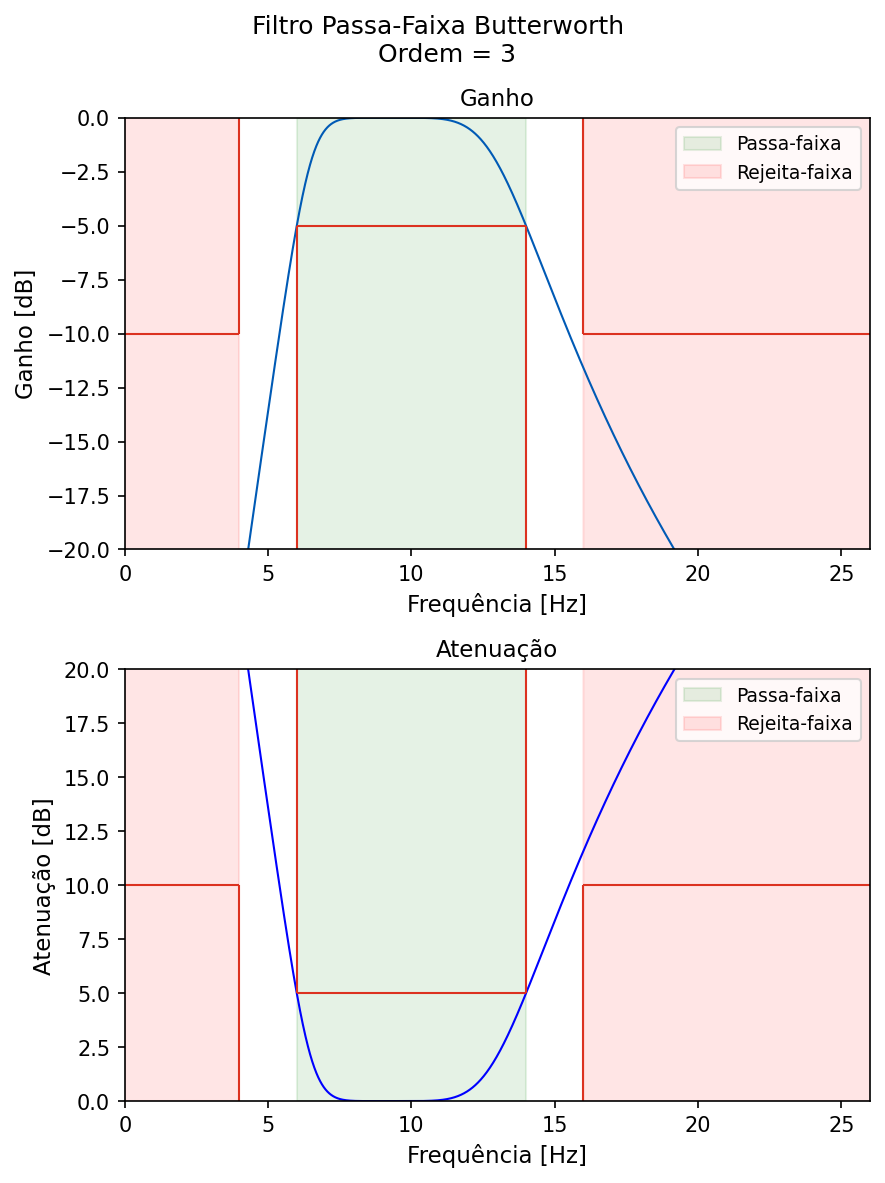

In [ ]:
# Design specs
f_low = 6        # Lower passband frequency in Hz
f_high = 14      # Upper passband frequency in Hz
f_stop_low = 4   # Lower stopband frequency in Hz  
f_stop_high = 16 # Upper stopband frequency in Hz
A_max = 5       # Passband ripple in dB
A_min = 10       # Stopband attenuation in dB
fs = s_r         # Sampling frequency in Hz

# Normalize frequencies
nyq = fs / 2
wp = [f_low / nyq, f_high / nyq]  # Passband edges (normalized)
ws = [f_stop_low / nyq, f_stop_high / nyq]  # Stopband edges (normalized)

# Determine minimum order and cutoff frequencies for band-stop Butterworth
N, Wn = buttord(wp, ws, A_max, A_min)


# Design the Butterworth band-stop filter
b, a = butter(N, Wn, btype='bandpass')


# Frequency response
w, h = freqz(b, a, fs=fs, worN=8192)
gain_db = 20 * np.log10(np.maximum(abs(h), 1e-10))  # avoid log(0)
attenuation_db = -gain_db

# Plot: Frequency Response with Boundaries
plt.figure(figsize=(6, 8))
plt.suptitle(f'Filtro Passa-Faixa Butterworth \n Ordem = {N}')

plt.subplot(211)
plt.plot(w, gain_db, color=blue)

# Fill Passband Stopband
plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_low) & (w <= f_high),
                 color='green', alpha=0.1,
                 label='Passa-faixa')


plt.fill_between(w, gain_db.min(), 0,
                 where=(w <= f_stop_low),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_stop_high),
                 color='red', alpha=0.1)

# Add cut-off lines
plt.hlines(-A_max, f_low, f_high, color=red, linestyle='-')

plt.vlines(f_low, -A_max, -A_min*2, color=red, linestyle='-')
plt.vlines(f_high, -A_max, -A_min*2, color=red, linestyle='-')

plt.hlines(-A_min, 0, f_stop_low, color=red, linestyle='-')
plt.hlines(-A_min, f_stop_high, fs/2, color=red, linestyle='-')

plt.vlines(f_stop_low, -A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, -A_min, 0, color=red, linestyle='-')


plt.title(f'Ganho')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho [dB]')
plt.xlim(0, f_stop_high + 10)
plt.ylim(-A_min * 2, 0)
plt.grid()
plt.legend(loc='upper right')

# Plot: Attenuation
plt.subplot(212)
plt.plot(w, attenuation_db, color='blue')

# Fill Passband Stopband
plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_low) & (w <= f_high),
                 color='green', alpha=0.1,
                 label='Passa-faixa')

plt.fill_between(w, 0, -gain_db.min(),
                 where=(w <= f_stop_low),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_stop_high),
                 color='red', alpha=0.1)

# Add cut-off lines 
plt.hlines(A_max, f_low, f_high, color=red, linestyle='-')

plt.vlines(f_low, A_max, A_min*2, color=red, linestyle='-')
plt.vlines(f_high, A_max, A_min*2, color=red, linestyle='-')


plt.hlines(A_min, 0, f_stop_low, color=red, linestyle='-')
plt.hlines(A_min, f_stop_high, fs/2, color=red, linestyle='-')

plt.vlines(f_stop_low, A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, A_min, 0, color=red, linestyle='-')

#Misc
plt.xlim(0, f_stop_high + 10)
plt.ylim(0, A_min * 2)

plt.title(f'Atenuação')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Atenuação [dB]')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()

plt.savefig("Figures/Fig05.svg")
plt.savefig("Figures/Fig05.png", dpi=600)
plt.show()


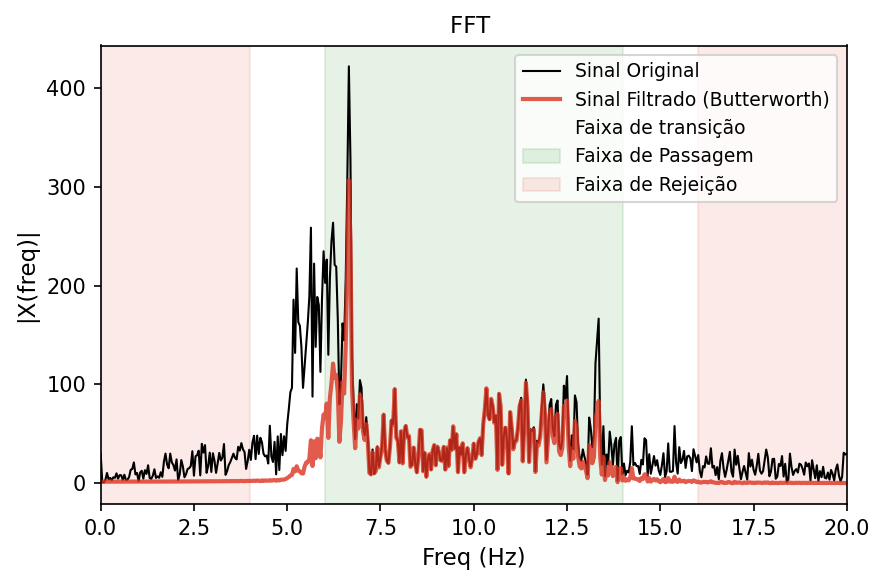

In [249]:
x_but= filtfilt(b, a, x)  ##  apply cheb filter on the Buteterworht filtered signal

plt.figure(figsize=(6, 4))
plot_fft_multiple(x, s_r, 'Sinal Original', color='k', linewidth=1)
plot_fft_multiple(x_but, s_r, 'Sinal Filtrado (Butterworth)', color=red, linewidth=2 ,alpha=0.8)

plt.axvspan(f_low, f_stop_low, color='w', alpha=0.)
plt.axvspan(f_high, f_stop_high, color='w', alpha=0.1, label='Faixa de transição')
plt.axvspan(f_low, f_high, color='g', alpha=0.1, label='Faixa de Passagem')
plt.axvspan(f_stop_low, 0, color=red, alpha=0.1)
plt.axvspan(f_stop_high, 20, color=red, alpha=0.1, label='Faixa de Rejeição')

plt.xlim(0, 20)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.savefig("Figures/Fig06.svg")
plt.savefig("Figures/Fig06.png", dpi=600)
plt.show()

## Chebyshev Filter Design (StopBand)

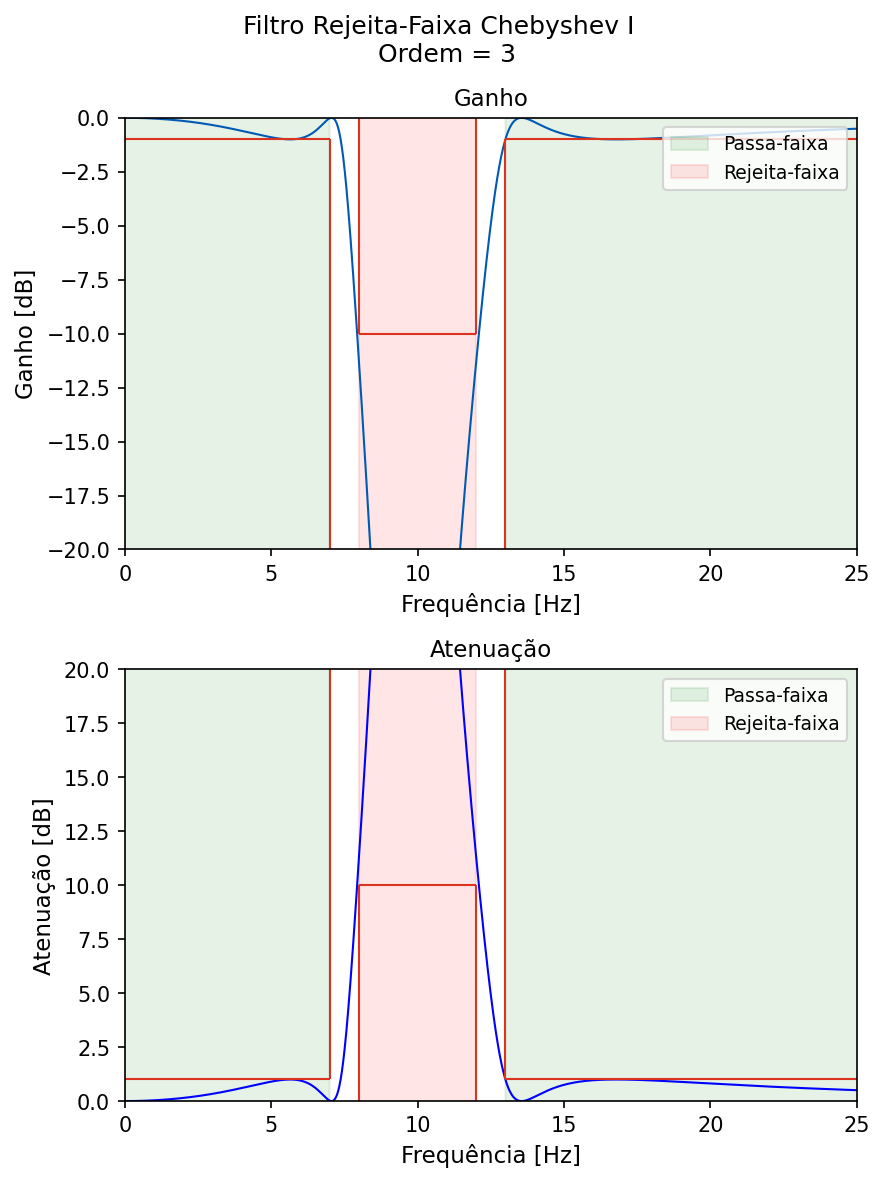

In [ ]:
# Design specs
f_low = 7        # Lower passband frequency in Hz (below stopband)
f_high = 13      # Upper passband frequency in Hz (above stopband)
f_stop_low = 8   # Lower stopband frequency in Hz (start of rejection)
f_stop_high = 12 # Upper stopband frequency in Hz (end of rejection)
A_max = 1        # Passband ripple in dB
A_min = 10       # Stopband attenuation in dB
fs = s_r         # Sampling frequency in Hz

# Normalize frequencies
nyq = fs / 2

# wp defines the passband edges (what we want to keep)
# ws defines the stopband edges (what we want to reject)
wp = [f_low / nyq, f_high / nyq]        # Passband edges (normalized)
ws = [f_stop_low / nyq, f_stop_high / nyq]  # Stopband edges (normalized)

# Determine minimum order and cutoff frequencies for bandpass
N, Wn = cheb1ord(wp, ws, A_max, A_min)

# Design the Chebyshev Type I bandpass filter
b, a = cheby1(N, A_max, Wn, btype='bandstop')

# Frequency response
w, h = freqz(b, a, fs=fs, worN=8192)
gain_db = 20 * np.log10(np.maximum(abs(h), 1e-10))  # avoid log(0)
attenuation_db = -gain_db


# Plot: Frequency Response with Boundaries
plt.figure(figsize=(6, 8))
plt.suptitle(f'Filtro Rejeita-Faixa Chebyshev I \n Ordem = {N}')

plt.subplot(211)
plt.plot(w, gain_db, color=blue)

# Fill Passbands and Stopband
plt.fill_between(w, gain_db.min(), 0,
                 where=(w <= f_low),
                 color='green', alpha=0.1,
                 label='Passa-faixa')

plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_high),
                 color='green', alpha=0.1)


plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_stop_low) & (w <= f_stop_high),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

# Add cut-off lines 

plt.hlines(-A_max, 0, f_low, color=red, linestyle='-')
plt.hlines(-A_max, f_high, fs/2, color=red, linestyle='-')

plt.vlines(f_low, -A_max, -A_min*2, color=red, linestyle='-')
plt.vlines(f_high, -A_max, -A_min*2, color=red, linestyle='-')

plt.hlines(-A_min, f_stop_low, f_stop_high, color=red, linestyle='-')

plt.vlines(f_stop_low, -A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, -A_min, 0, color=red, linestyle='-')

#Misc
plt.title(f'Ganho')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho [dB]')
plt.xlim(0, 25)
plt.ylim(-A_min * 2, 0)
plt.grid()
plt.legend(loc='upper right')

# Plot: Attenuation
plt.subplot(212)
plt.plot(w, attenuation_db, color='blue')

# Fill Passbands and Stopband
plt.fill_between(w, 0, -gain_db.min(),
                 where=(w <= f_low),
                 color='green', alpha=0.1,
                 label='Passa-faixa')

plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_high),
                 color='green', alpha=0.1)


plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_stop_low) & (w <= f_stop_high),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

# Add cut-off lines
plt.hlines(A_max, 0, f_low, color=red, linestyle='-')
plt.hlines(A_max, f_high, fs/2, color=red, linestyle='-')

plt.vlines(f_low, A_max, A_min*2, color=red, linestyle='-')
plt.vlines(f_high, A_max, A_min*2, color=red, linestyle='-')

plt.hlines(A_min, f_stop_low, f_stop_high, color=red, linestyle='-')

plt.vlines(f_stop_low, A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, A_min, 0, color=red, linestyle='-')

# Misc
plt.xlim(0, 25)
plt.ylim(0, A_min * 2)

plt.title(f'Atenuação')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Atenuação [dB]')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()

plt.savefig("Figures/Fig07.svg")
plt.savefig("Figures/Fig07.png", dpi=600)
plt.show()




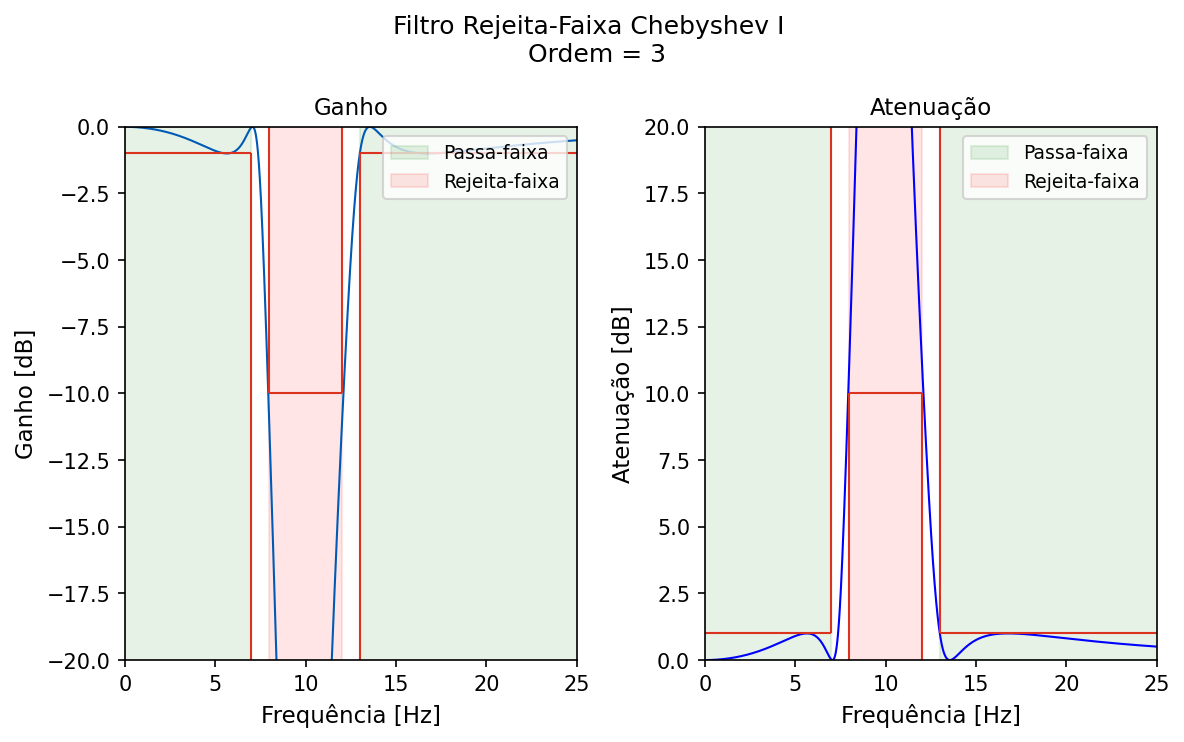

In [261]:
# Plot: Frequency Response with Boundaries
plt.figure(figsize=(8, 5))
plt.suptitle(f'Filtro Rejeita-Faixa Chebyshev I \n Ordem = {N}')

plt.subplot(121)
plt.plot(w, gain_db, color=blue)

# Fill Passbands and Stopband
plt.fill_between(w, gain_db.min(), 0,
                 where=(w <= f_low),
                 color='green', alpha=0.1,
                 label='Passa-faixa')

plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_high),
                 color='green', alpha=0.1)


plt.fill_between(w, gain_db.min(), 0,
                 where=(w >= f_stop_low) & (w <= f_stop_high),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

# Add cut-off lines 

plt.hlines(-A_max, 0, f_low, color=red, linestyle='-')
plt.hlines(-A_max, f_high, fs/2, color=red, linestyle='-')

plt.vlines(f_low, -A_max, -A_min*2, color=red, linestyle='-')
plt.vlines(f_high, -A_max, -A_min*2, color=red, linestyle='-')

plt.hlines(-A_min, f_stop_low, f_stop_high, color=red, linestyle='-')

plt.vlines(f_stop_low, -A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, -A_min, 0, color=red, linestyle='-')

#Misc
plt.title(f'Ganho')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho [dB]')
plt.xlim(0, 25)
plt.ylim(-A_min * 2, 0)
plt.grid()
plt.legend(loc='upper right')

# Plot: Attenuation
plt.subplot(122)
plt.plot(w, attenuation_db, color='blue')

# Fill Passbands and Stopband
plt.fill_between(w, 0, -gain_db.min(),
                 where=(w <= f_low),
                 color='green', alpha=0.1,
                 label='Passa-faixa')

plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_high),
                 color='green', alpha=0.1)


plt.fill_between(w, 0, -gain_db.min(),
                 where=(w >= f_stop_low) & (w <= f_stop_high),
                 color='red', alpha=0.1,
                 label='Rejeita-faixa')

# Add cut-off lines
plt.hlines(A_max, 0, f_low, color=red, linestyle='-')
plt.hlines(A_max, f_high, fs/2, color=red, linestyle='-')

plt.vlines(f_low, A_max, A_min*2, color=red, linestyle='-')
plt.vlines(f_high, A_max, A_min*2, color=red, linestyle='-')

plt.hlines(A_min, f_stop_low, f_stop_high, color=red, linestyle='-')

plt.vlines(f_stop_low, A_min, 0, color=red, linestyle='-')
plt.vlines(f_stop_high, A_min, 0, color=red, linestyle='-')

# Misc
plt.xlim(0, 25)
plt.ylim(0, A_min * 2)

plt.title(f'Atenuação')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Atenuação [dB]')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()

plt.savefig("Figures/Fig07.svg")
plt.savefig("Figures/Fig07.png", dpi=600)
plt.show()

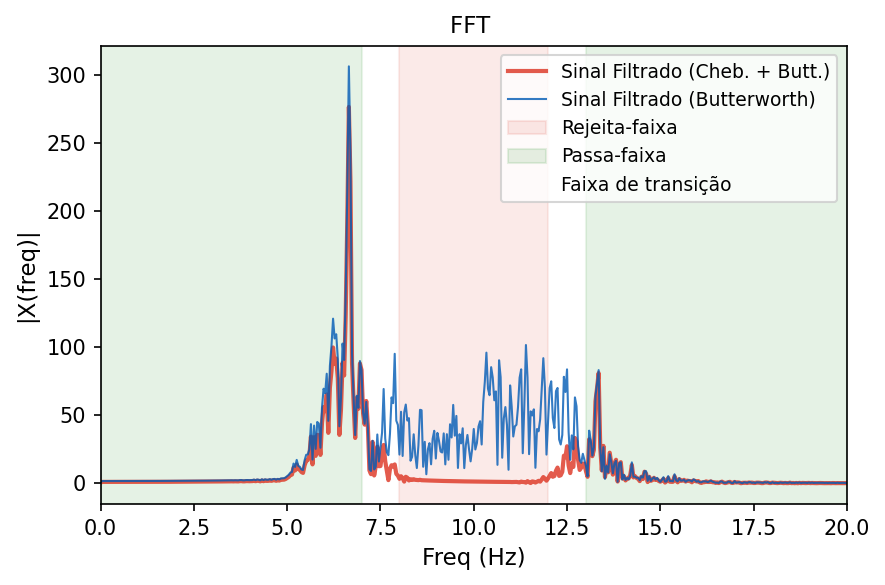

In [ ]:
x_cheb= filtfilt(b, a, x_but)  ##  apply cheb filter on the Buteterworht filtered signal

plt.figure(figsize=(6, 4))
#plot_fft_multiple(x, s_r, 'Sinal Original', color='k', linewidth=1)
plot_fft_multiple(x_cheb, s_r, 'Sinal Filtrado (Cheb. + Butt.)', color=red, linewidth=2 ,alpha=0.8)
plot_fft_multiple(x_but, s_r, 'Sinal Filtrado (Butterworth)', color=blue, linewidth=1 ,alpha=0.8)
plt.axvspan(f_stop_low, f_stop_high, color= red, alpha=0.1, label='Rejeita-faixa')
plt.axvspan(f_low, 0, color='g', alpha=0.1, label='Passa-faixa')
plt.axvspan(f_high, 20, color='g', alpha=0.1)
plt.axvspan(f_low, f_stop_low, color='w', alpha=0.1, label='Faixa de transição')
plt.axvspan(f_high, f_stop_high, color='w', alpha=0.1)
plt.xlim(0, 20)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

# plt.savefig("Figures/Fig08.svg")
# plt.savefig("Figures/Fig08.png", dpi=600)
plt.show()

## Wavelet on filtered signal

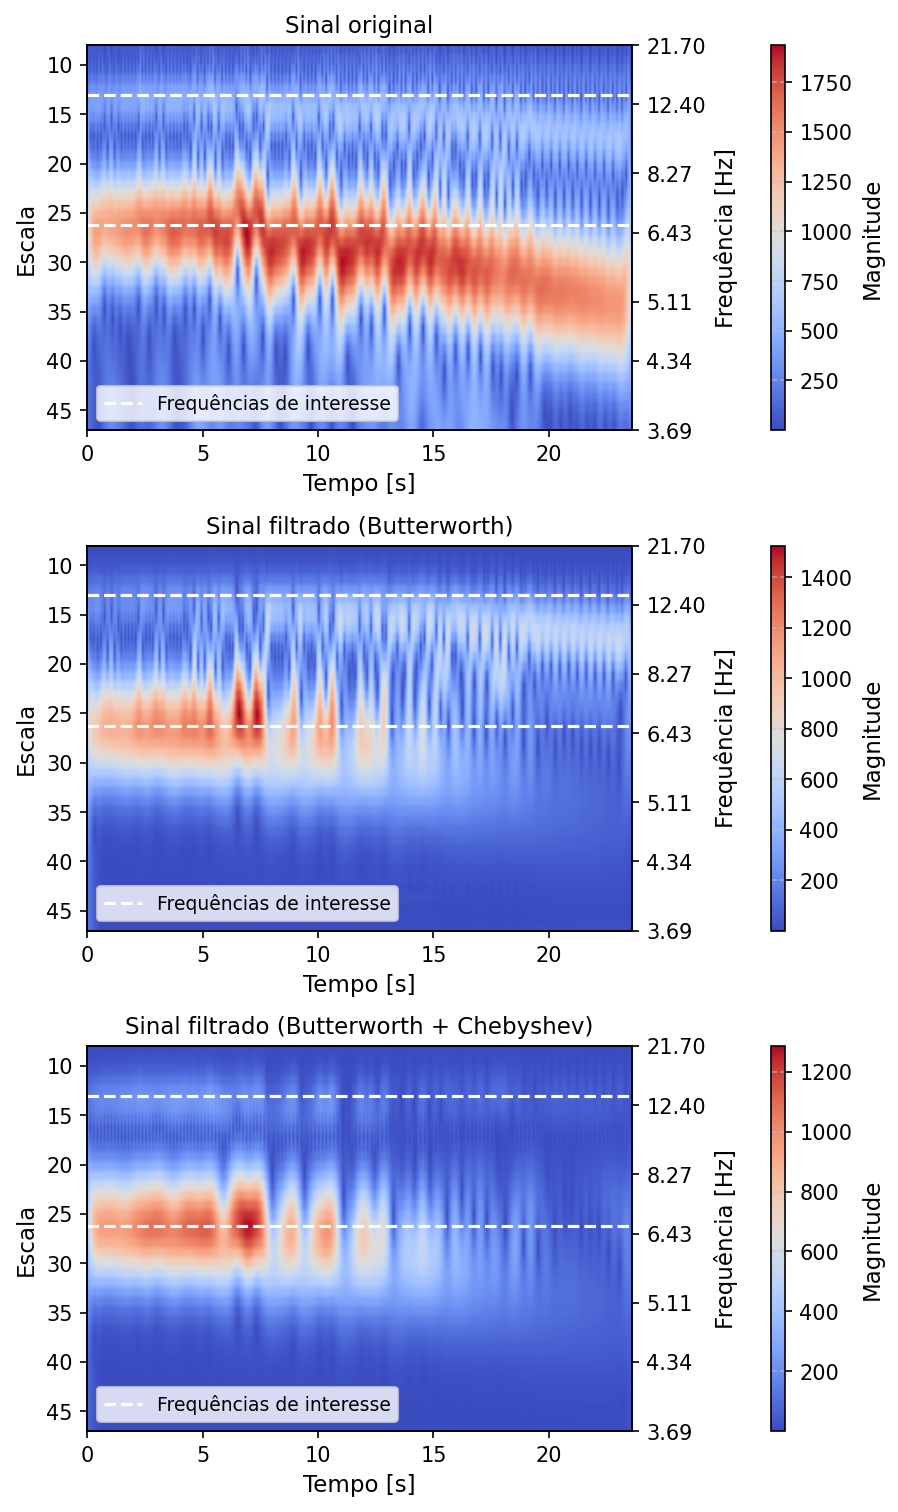

In [264]:
scale=(8,48)
wavelet = 'cmor2.0-1.0'

fig = plt.figure(figsize=(6, 12))

# Create GridSpec 
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], width_ratios=[20, 0.5], wspace=0.5, hspace=0.3)

# First wavelet plot
ax1 = fig.add_subplot(gs[0, 0])
_, _, im1 = plot_wavelet_transform(x, s_r, ax=ax1, fig=fig, f1=f1, f2=f2, 
                                    scale=scale, wavelet_str=wavelet,
                                    title=f"Sinal original")

# Colorbar for first plot
cax1 = fig.add_subplot(gs[0, 1])
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.set_label('Magnitude')

# Second wavelet plot
ax2 = fig.add_subplot(gs[1, 0])
_, _, im2 = plot_wavelet_transform(x_but, s_r, ax=ax2, fig=fig, f1=f1, f2=f2, 
                                    scale=scale, wavelet_str=wavelet,
                                    title=f"Sinal filtrado (Butterworth)")

# Colorbar for second plot
cax2 = fig.add_subplot(gs[1, 1])
cbar2 = fig.colorbar(im2, cax=cax2)
cbar2.set_label('Magnitude')

# third wavelet plot
ax3 = fig.add_subplot(gs[2, 0])
_, _, im3 = plot_wavelet_transform(x_cheb, s_r, ax=ax3, fig=fig, f1=f1, f2=f2, 
                                    scale=scale, wavelet_str=wavelet,
                                    title=f"Sinal filtrado (Butterworth + Chebyshev)")

# Colorbar for second plot
cax3 = fig.add_subplot(gs[2, 1])
cbar3 = fig.colorbar(im3, cax=cax3)
cbar3.set_label('Magnitude')

plt.savefig("Figures/Fig09.svg")
plt.savefig("Figures/Fig09.png", dpi=600)

plt.show()

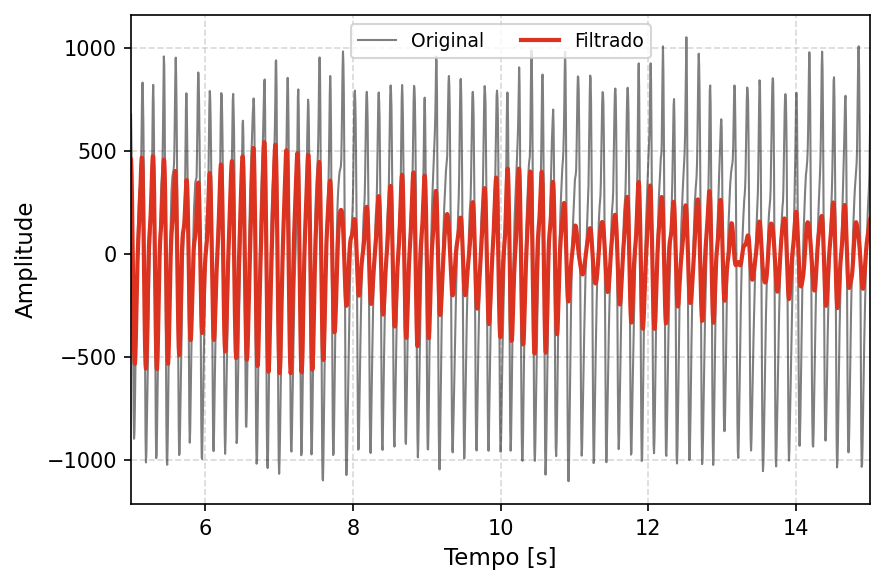

In [280]:
plt.figure(figsize=(6, 4))
plt.plot(time, x, label='Original', color='k', linewidth=1, alpha=0.5)
plt.plot(time, x_cheb, label='Filtrado' , color=red, linewidth=2)
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend(fontsize=9, ncols=2)

plt.grid(True)
plt.xlim(5, 15)
plt.tight_layout()
plt.savefig("Figures/Fig10.svg")
plt.savefig("Figures/Fig10.png", dpi=600)
plt.show()